In [1]:
!pip install dtreeviz

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [2]:
import graphviz.backend as be

In [16]:
import dtreeviz
from dtreeviz.trees import *
from IPython.display import Image, display_svg , SVG

In [4]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch","Embarked"]
target = "Survived"
df=df[features+[target]].copy()

In [6]:
df[features].isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [7]:
df['Age']=df["Age"].fillna(df["Age"].median())

In [8]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [9]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [10]:
X=df.drop("Survived",axis=1)
y=df['Survived']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y) # stratify keeps class balance.

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4,criterion='gini',random_state=42)

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score
y_pred=dt.predict(X_test)
print("Accuracy Score =",accuracy_score(y_test,y_pred))

Accuracy Score = 0.7877094972067039


C:\Users\Sahil sharma\anaconda3\Lib\site-packages\dtreeviz\trees.py:828: UserWarning: AI chat was requested, but dtreeviz was not initialized with ai_chat=True. 
AI commentary will be skipped. 
Enable it when instantiating the dtreeviz model using the ai_chat=True parameter.
C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


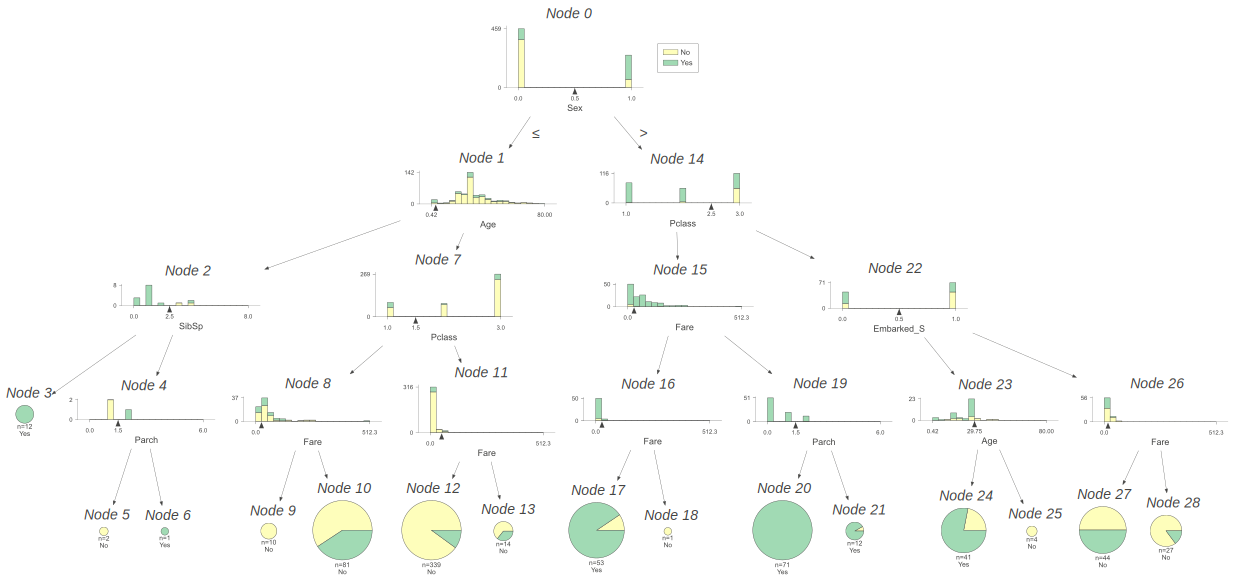

In [25]:
X=X_test.loc[[241]]

viz_model=dtreeviz.model(
    dt,
    X_train,
    y_train,
    feature_names=X_train.columns,
    class_names=['No','Yes'],
    # X_test=X,  # is used when I want to get path of prediction.
)

viz=viz_model.view(show_node_labels=True)
# scale=1.5,
# orientation='LR',
# fancy=False, # without graph
# show_just_path=True  # use when Predicting

viz